In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [28]:
# Load the dataset
df = pd.read_csv("D:\\Kaggle\\Advertising Sales Dataset\\Advertising Budget and Sales.csv")  # Assuming you have a CSV file with your data
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [27]:
df.head(20)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [24]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


In [29]:
# Drop unnecessary columns
df = df.drop("Unnamed: 0", axis=1)
df

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'TV spent VS Sales')

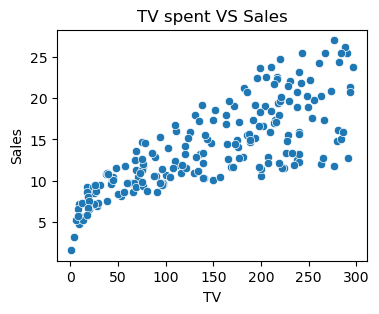

In [6]:
# Visualize the relationship between TV Ad Budget and Sales
plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x="TV Ad Budget ($)", y="Sales ($)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV spent VS Sales")

<Axes: >

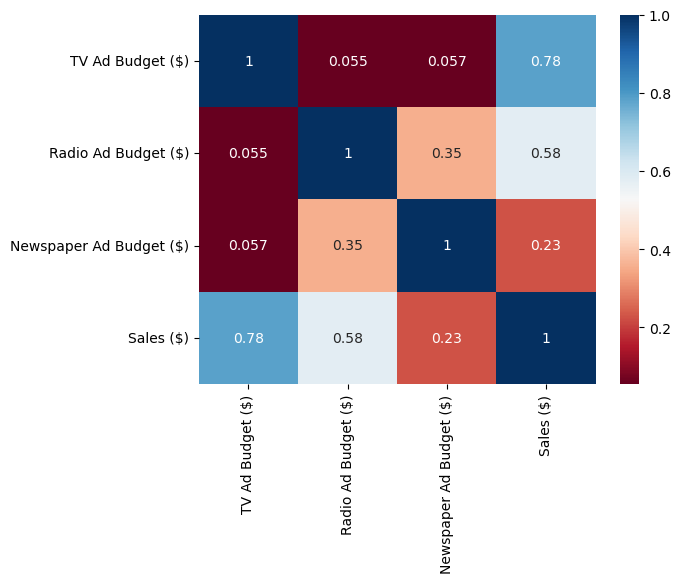

In [7]:
# Check correlation between variables
sns.heatmap(df.corr(), annot=True, cmap="RdBu")


In [10]:
# Split the data into features (X) and target (y)
X = df.drop('Sales ($)', axis=1)
y = df['Sales ($)']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
# Implement Gradient Descent for Linear Regression
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias using Gradient Descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [18]:

# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Train the model
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

In [20]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [21]:
# Evaluate the model
print(f"Mean Absolute Error MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Absolute Error RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Absolute Error MAE: 1.1439808138321463
Mean Squared Error MSE: 2.428933657023543
Root Mean Absolute Error RMSE: 1.5585036596118544
